In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [53]:
# load data
path = "data/Dataset_PartB.xlsx"
# sheet number 1 is only details about the data, we need sheet 2-8
num_sheet = list(range(1, 9))
data = pd.read_excel(path, sheet_name=num_sheet, header=0, index_col=0)
details = pd.read_excel(path, sheet_name=0, header=0)

We will select the following parameters:
- `area`: the area of the cell
- `perimeter`: the perimeter of the cell


In [ ]:
# keep only the interesting columns in data1
for i in num_sheet:
    data[i] = data[i]['Area', 'X', 'Y', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'AR', 'Round', 'Solidity', 'Feret', 'MinFeret', 'FeretX', 'FeretY', 'FeretAngle']

In [ ]:
data[1].head()

,Area,X,Y,Perim.,BX,BY,Width,Height,Major,Minor,Angle,Circ.,AR,Round,Solidity,Feret,MinFeret,FeretX,FeretY,FeretAngle
,,,,,,,,,,,,,,,,,,,,
1,1548,64.477,200.478,149.196,45,174,38,52,52.051,37.866,89.548,0.874,1.375,0.727,0.965,52.345,38.0,61,174,96.582
2,1788,57.502,221.805,160.895,40,189,35,63,63.491,35.856,88.642,0.868,1.771,0.565,0.999,63.388,35.0,53,252,83.660
3,1778,60.145,45.400,159.834,43,13,35,62,62.731,36.088,88.655,0.875,1.738,0.575,1.000,62.650,35.0,53,75,81.741
4,1590,60.765,115.052,149.049,44,86,34,56,57.225,35.377,87.761,0.899,1.618,0.618,1.000,56.436,34.0,56,142,82.875
5,2261,60.346,201.976,180.278,41,166,39,71,72.295,39.820,90.596,0.874,1.816,0.551,1.001,71.253,39.0,56,237,85.170


In [79]:
def boxplot_fig(data, col, title, y_label, y_lim):
    fig, ax = plt.subplots()
    ax.boxplot([data[i][col] for i in num_sheet], showmeans=True, meanline=True)
    ax.set_xticklabels(num_sheet)
    ax.set_xlabel('Run number')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    # set a y limit
    ax.set_ylim(y_lim[0], y_lim[1])
    plt.show()

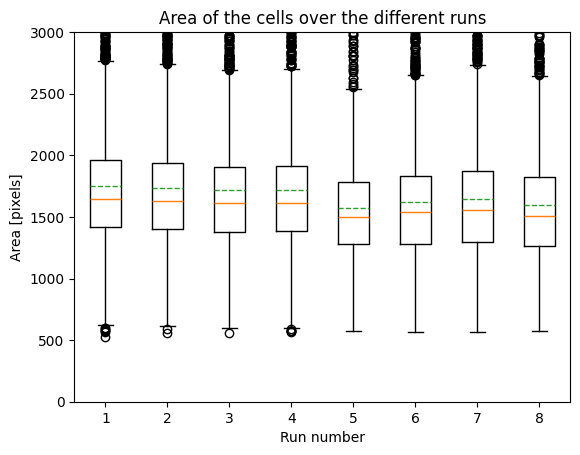

In [82]:
boxplot_fig(data, 'Area', 'Area of the cells over the different runs', 'Area [pixels]', (0, 3000))

Arithmetic mean is the green dased line.

Median is the orange line.

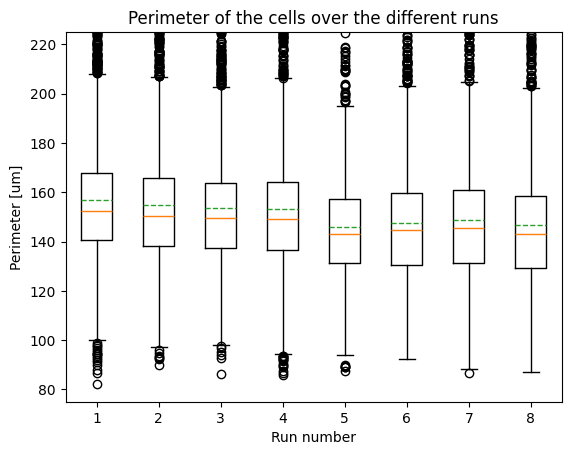

In [87]:
boxplot_fig(data, 'Perim.', 'Perimeter of the cells over the different runs', 'Perimeter [um]', (75, 225))

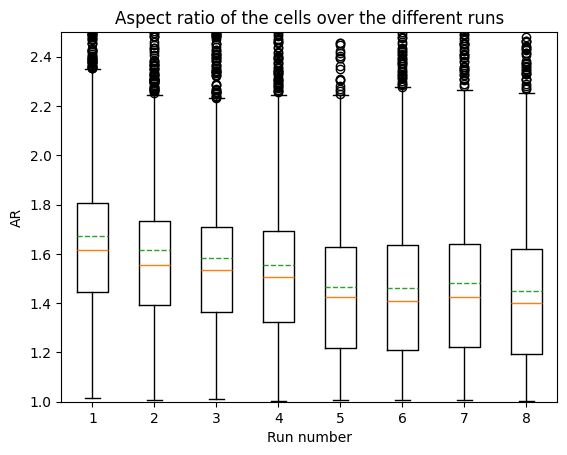

In [93]:
boxplot_fig(data, 'AR', 'Aspect ratio of the cells over the different runs', 'AR', (1, 2.5))

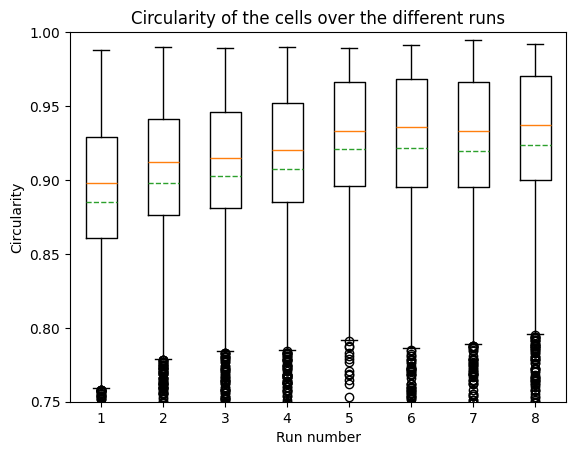

In [95]:
boxplot_fig(data, 'Circ.', 'Circularity of the cells over the different runs', 'Circularity', (0.75, 1))

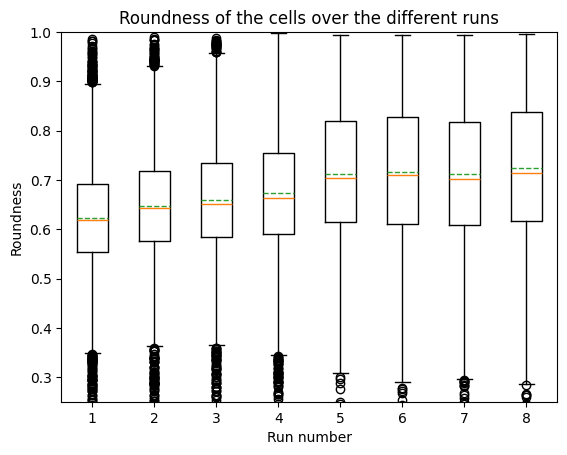

In [97]:
boxplot_fig(data, 'Round', 'Roundness of the cells over the different runs', 'Roundness', (0.25, 1))

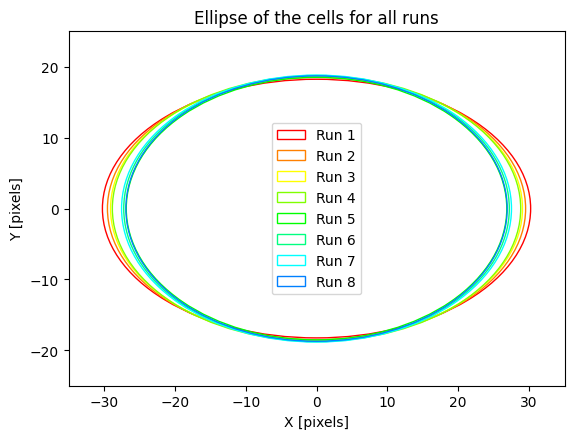

In [114]:
# plot an ellipse based on the mean value of the major and minor axis of the cells of run 1
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-35, 35)
ax.set_ylim(-25, 25)
ax.set_xlabel('X [pixels]')
ax.set_ylabel('Y [pixels]')
ax.set_title('Ellipse of the cells for all runs')
# define a list of 8 colors in chromatic order
colors = ['#ff0000', '#ff8000', '#ffff00', '#80ff00', '#00ff00', '#00ff80', '#00ffff', '#0080ff']
for i in num_sheet:
    minor = data[i]['Minor'].mean()
    major = data[i]['Major'].mean()
    ellipse = Ellipse(xy=(0, 0), width=major, height=minor, edgecolor=colors[i-1], fc='None', lw=1, label='Run '+str(i))
    ax.add_patch(ellipse)
ax.legend()
plt.show()
